This notebook is a re-implementation of [Scanpy clustering tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

To get the data:

```
cd examples
wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
```

# Options

In [53]:
%load_ext autoreload
%autoreload 2

import os
import scanpy as sc
import matplotlib.pyplot as plt
from crispr.class_sc import Omics
import pandas as pd
import numpy as np

sc.settings.set_figure_params(dpi=80, frameon=False)

file = "data/filtered_gene_bc_matrices/hg19/"
method_cluster = "leiden"
kws_init = {"assay": None, "assay_protein": None, 
            "col_gene_symbols": "gene_symbols", 
            "col_cell_type": method_cluster, 
            "col_sample_id": None}
kws_pp = {"kws_hvg": {"flavor": "cell_ranger",  "min_mean": 0.0125, 
                      "max_mean": 3, "min_disp": 0.5, "filter": True}, 
          "target_sum": 10000.0, 
          "cell_filter_pmt": [0, 5], 
          "cell_filter_ngene": [200, None], 
          "gene_filter_ncell": [3, None], 
          "gene_filter_ncounts": [None, 2500], 
          "regress_out": ["total_counts", "pct_counts_mt"], 
          "kws_scale": {"max_value": 10}}
kws_cluster = {"method_cluster": method_cluster, 
               "kws_umap": {}, 
               "kws_neighbors": {"n_neighbors": 10, "n_pcs": 40},
               "kws_pca": {"svd_solver": "arpack", 
                           "use_highly_variable": False}, 
               "kws_cluster": {}, 
               "resolution": 0.5,
               "paga": False}
model_celltypist = "Immune_All_High.pkl"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Workflow

*** Using layer: scaled.
Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': None, 'col_batch': None, 'col_condition': None, 'col_num_umis': None, 'key_control': None, 'key_treatment': None}


<<< PERFORMING PCA >>>

 {'svd_solver': 'arpack', 'use_highly_variable': False}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>

{'n_neighbors': 10, 'n_pcs': 40}


<<< EMBEDDING: UMAP with PAGA >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


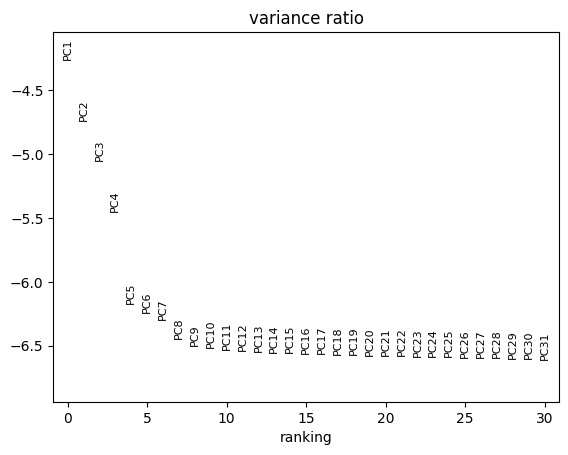

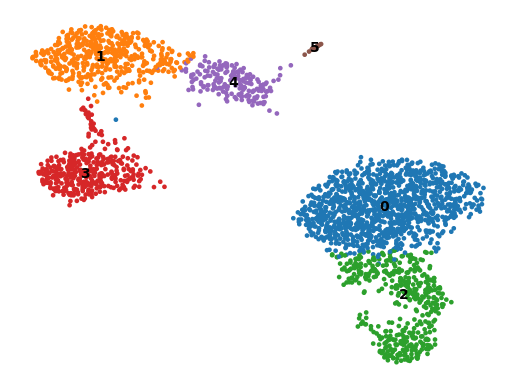

In [48]:

_, res_cl = self.cluster(**kws_cluster, seed=None)  # cluster; res_cl = figures



<<< INITIALIZING CRISPR CLASS OBJECT >>>

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id=None
col_batch=None
col_condition=None
col_num_umis=None
key_control=None
key_treatment=None

<<< LOADING 10X FILE data/filtered_gene_bc_matrices/hg19/ >>>


Cell Counts: Initial

2700


Gene Counts: Initial



 AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    layers: 'counts'
                     gene_ids
gene_symbols                 
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1]
AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids'
    layers: 'counts'

Un-Used Keyword A

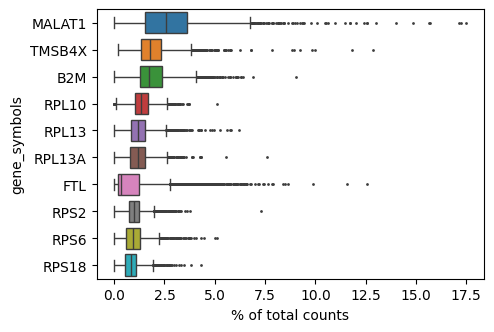


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


'NoneType' object has no attribute 'get_legend_handles_labels'
       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count       32738.000000  32738.000000       32738.000000   
mean           69.854114      0.072298           0.035069   
std           238.263898      0.852401           0.168253   
min             0.000000      0.000000           0.000000   
25%             0.000000      0.000000           0.000000   
50%             1.000000      0.000370           0.000370   
75%            35.000000      0.013704           0.013611   
max          2700.000000     59.883335           4.108960   

       pct_dropout_by_counts   total_counts  log1p_total_counts  
count           32738.000000   32738.000000        32738.000000  
mean               97.412811     195.205292            1.791439  
std                 8.824589    2301.482666            2.252671  
min             

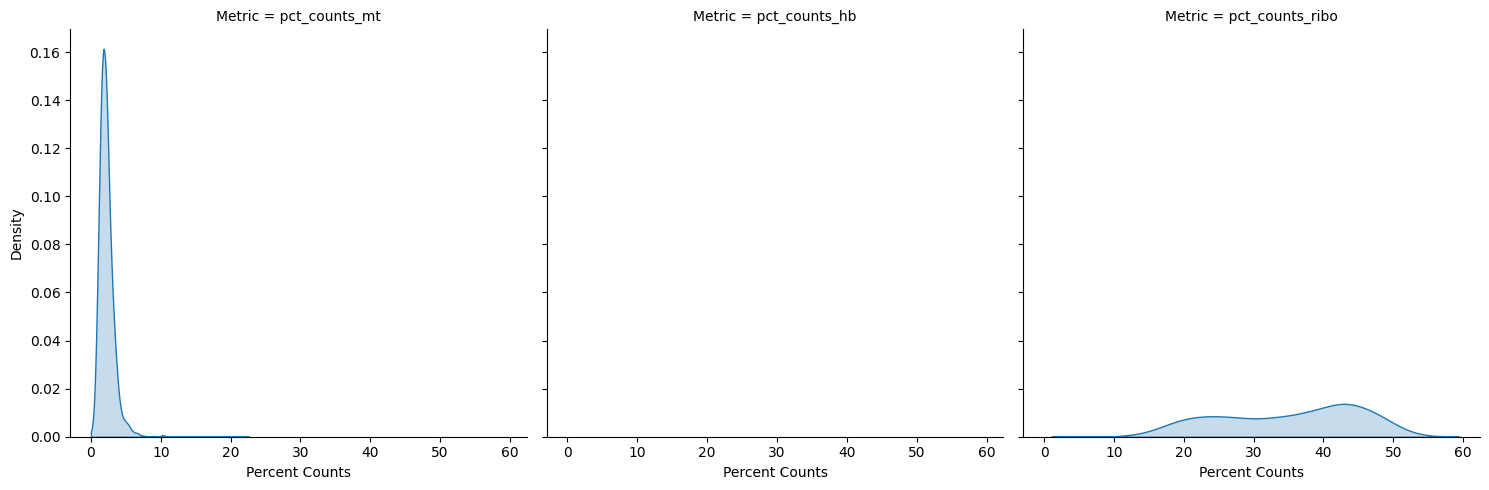

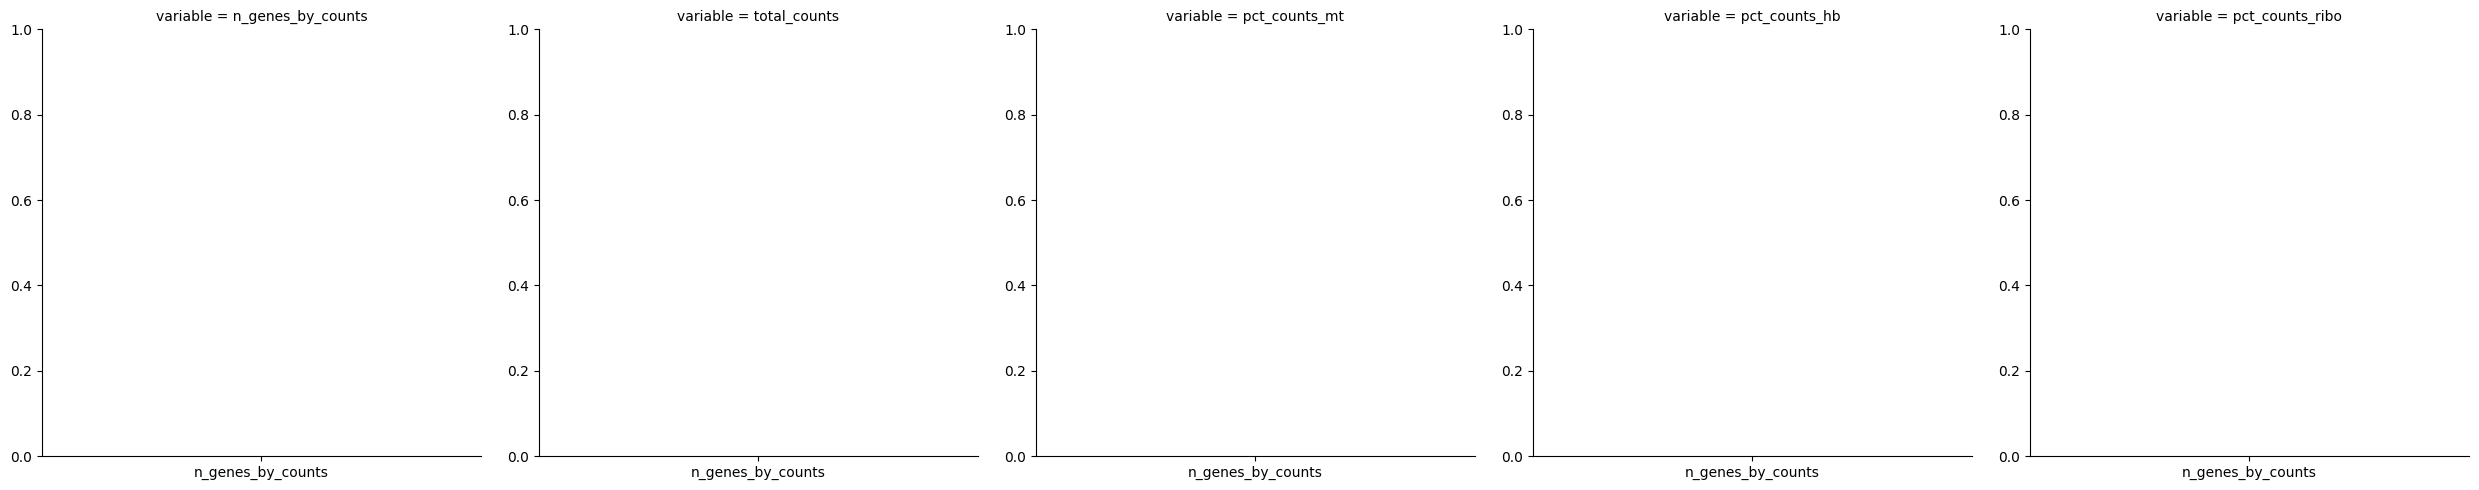

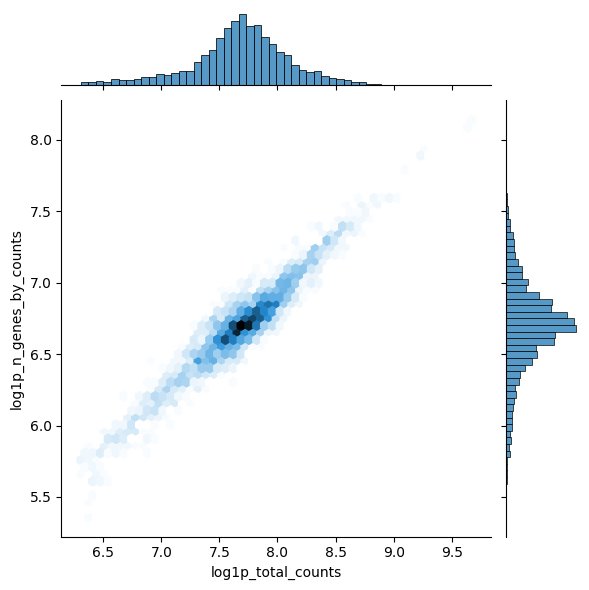

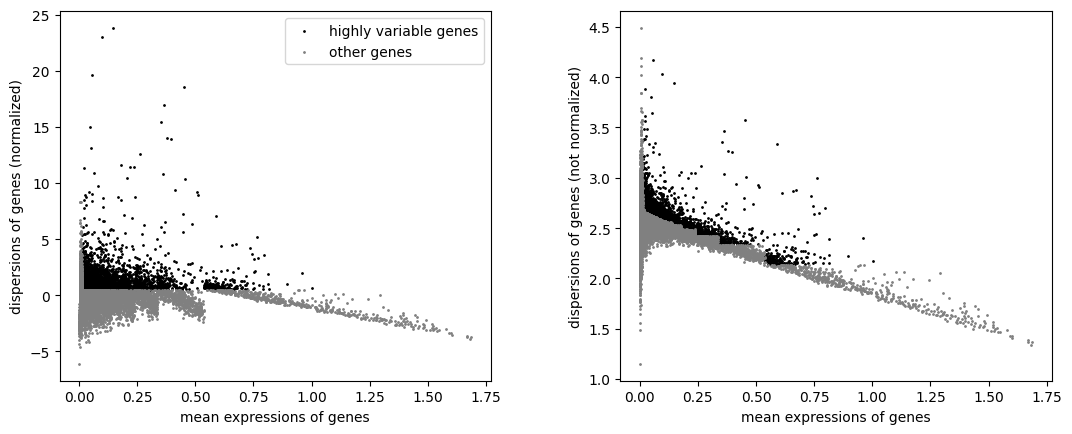


<<< REGRESSING OUT CONFOUNDS >>>

	['total_counts', 'pct_counts_mt']

<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Scaling gene expression...

	*** Clipping maximum GEX SD to 10...

	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing

2643


Gene Counts: Post-Processing



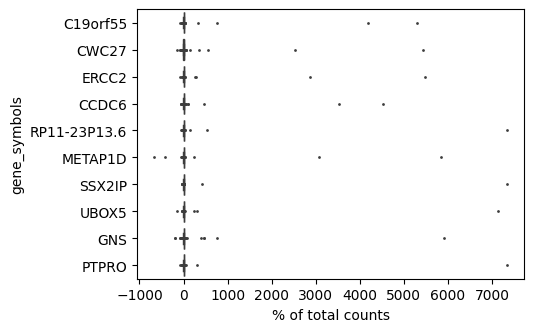


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


'NoneType' object has no attribute 'get_legend_handles_labels'
       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count            13420.0  1.342000e+04       1.342000e+04   
mean              2643.0 -7.244254e-03      -7.319457e-03   
std                  0.0  9.784560e-03       9.897003e-03   
min               2643.0 -2.486825e-02      -2.518268e-02   
25%               2643.0 -1.871695e-02      -1.889433e-02   
50%               2643.0 -1.986969e-04      -1.987167e-04   
75%               2643.0  0.000000e+00       0.000000e+00   
max               2643.0  7.216605e-09       7.216605e-09   

       pct_dropout_by_counts  total_counts  log1p_total_counts       n_cells  \
count                13420.0  13420.000000         6943.000000  13420.000000   
mean                     0.0    -19.146563           -0.073672    125.964158   
std                      0.0     25.8605

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

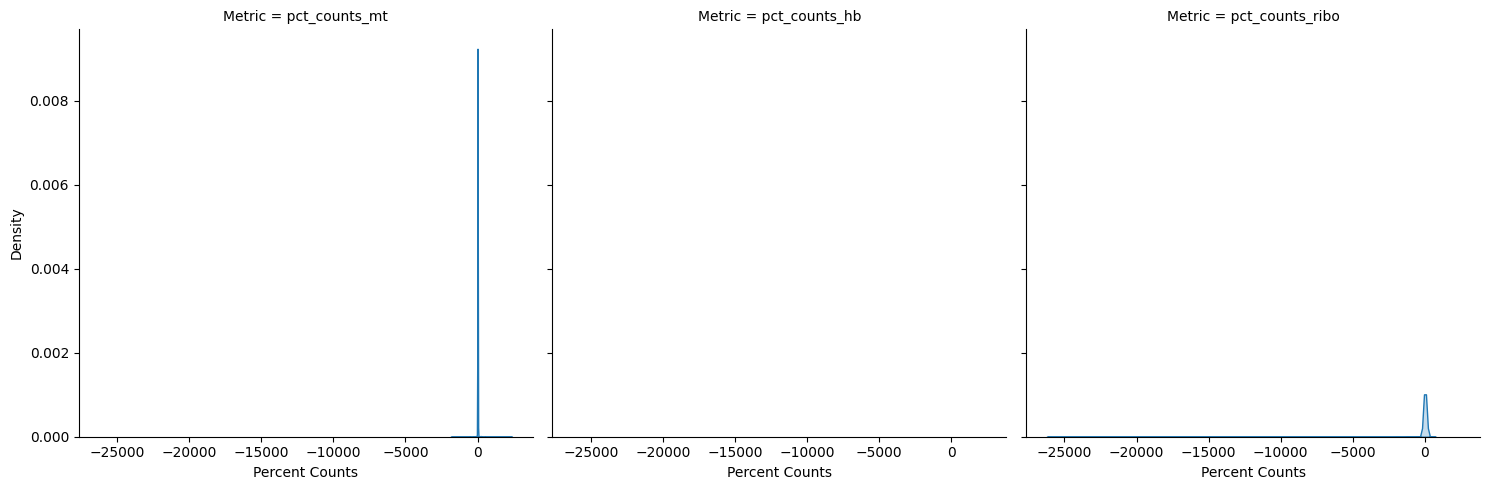

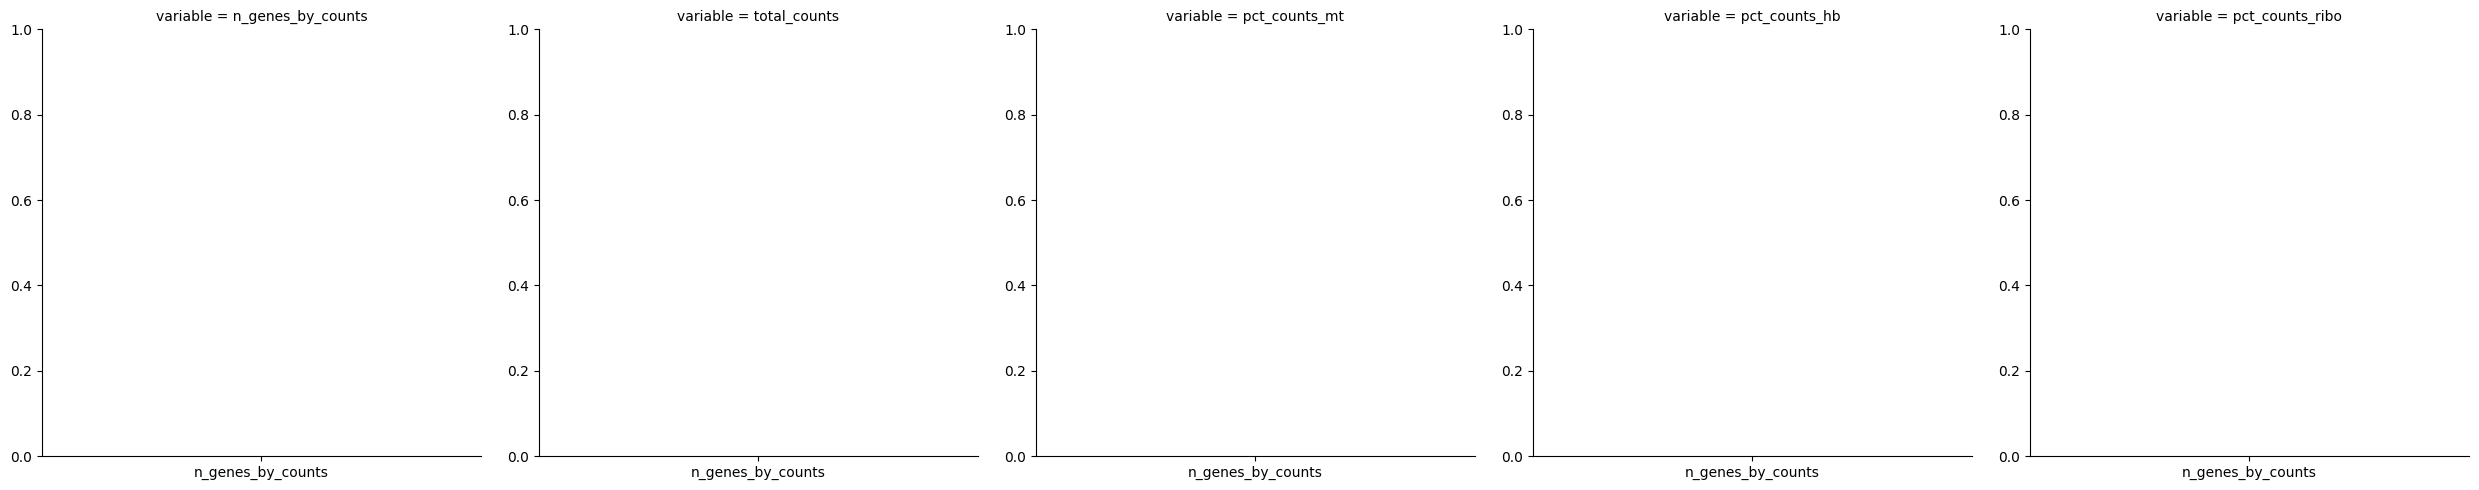

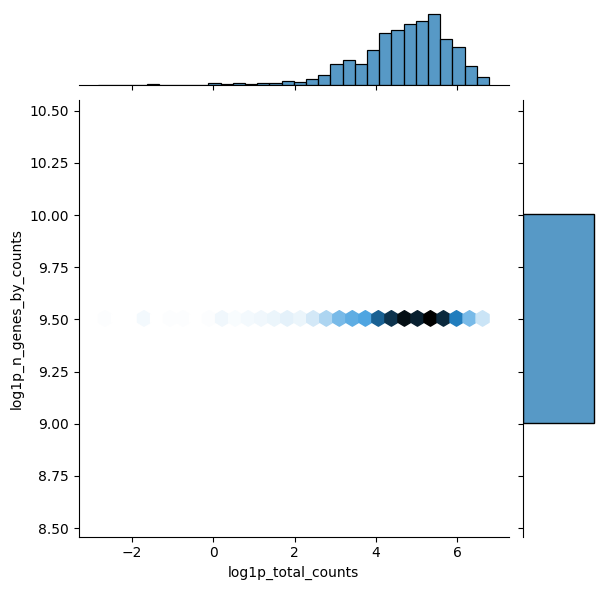

In [51]:
self = Omics(file, **kws_init)  # initialize object
_, res_pp = self.preprocess(**kws_pp)  # preprocess; res_pp = figures
_, res_cl = self.cluster(**kws_cluster, seed=None)  # cluster; res_cl = figures
mark, fig = self.find_markers()  # find cluster gene markers
_, res_ct = self.annotate_clusters(model_celltypist)  # [results, figures]

# Extra

In [ ]:
genes = ["CST3", "NKG7", "PPBP"]
self.plot(genes, kws_umap=dict(cmap="magma", vcenter=None, vmax=10),
          kws_heat=dict(vcenter=0, cmap="coolwarm"), 
          kws_matrix=dict(vcenter=0, cmap="coolwarm"))